## Project - Abalone

### Problem Statement :



The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

we have to predict the rings of each abalone which will lead us to the age of that abalone. 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Renaming and calling the dataset

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Checking the data shape

In [68]:
df.shape

(4027, 9)

The data has 4027 no of rows and 9 no of columns.

### Obtaining the column names inolved in our dataset.

In [69]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4027 non-null   int64  
 1   Length          4027 non-null   float64
 2   Diameter        4027 non-null   float64
 3   Height          4027 non-null   float64
 4   Whole weight    4027 non-null   float64
 5   Shucked weight  4027 non-null   float64
 6   Viscera weight  4027 non-null   float64
 7   Shell weight    4027 non-null   float64
 8   Rings           4027 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 314.6 KB


### Checking the data-types under the respective columns.

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [71]:
df['Sex'].unique()

array([2, 0, 1])

#### Transforming the alphabetic values into numeric values.

In [72]:
le=preprocessing.LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Visual Representation of the data

### Graph for the target variable 'class' of the dataset - Univariate Analysis

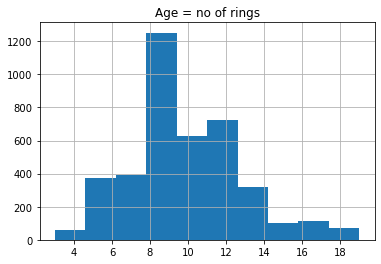

In [74]:
df['Rings'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Age = no of rings')
plt.show()

- The no of rings represent the age of the particular shell abalone.

## Correlation Graph for the dataset

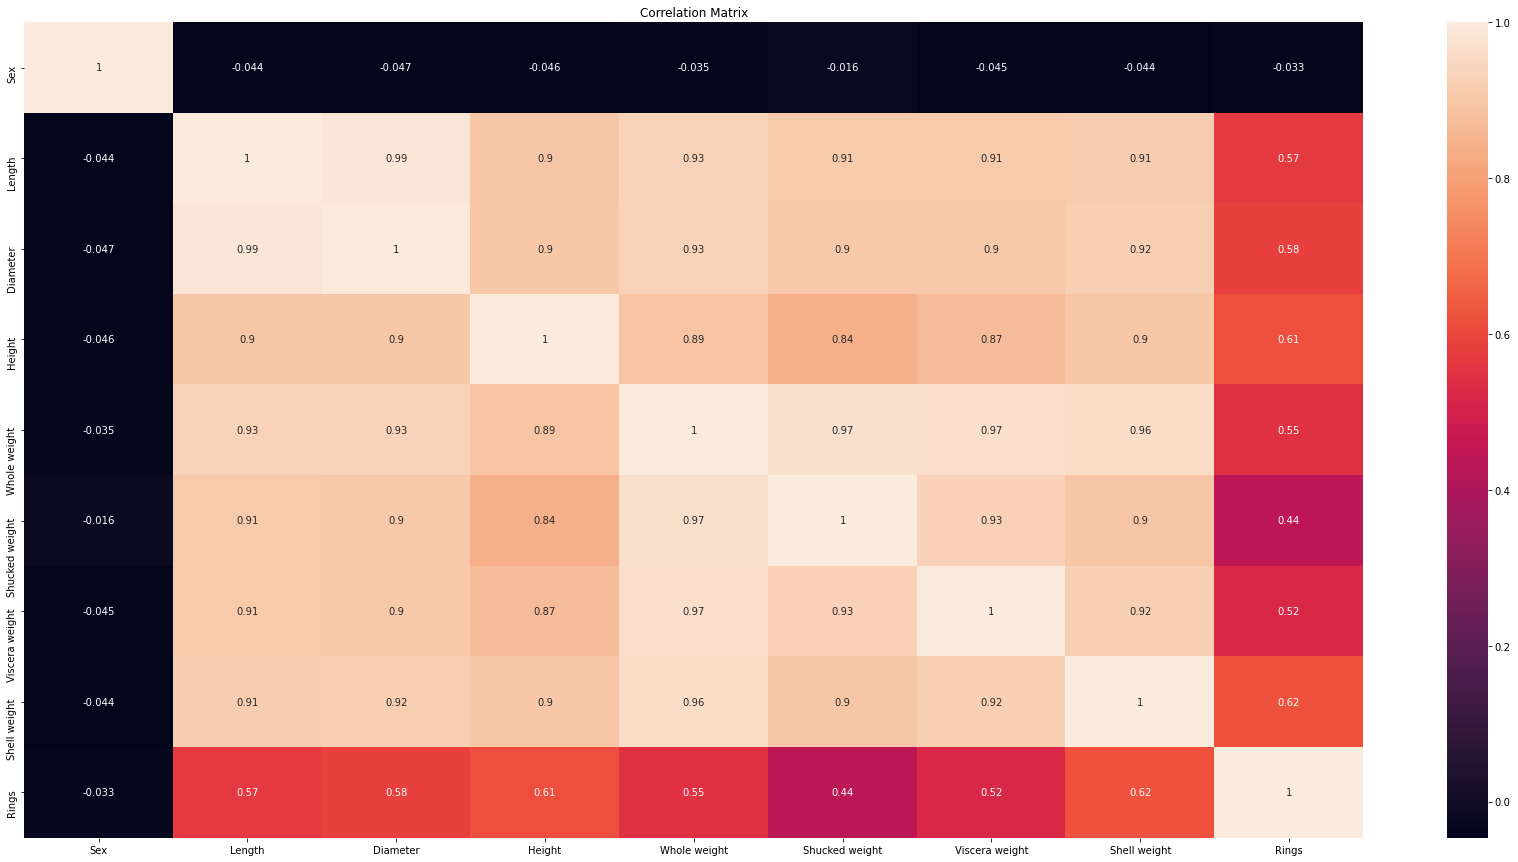

In [75]:
corr_mat=df.corr()

plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

- The darkest shade shows the negative correation , which means it impacts the target variable in inversely proportional manner.
- The brighter shade indicates the high poisitive correlation with the target variable.

## Correlation Coefficient value 

In [77]:
corr_matrix=df.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.016457
Rings            -0.033272
Whole weight     -0.034776
Length           -0.043639
Shell weight     -0.043825
Viscera weight   -0.045292
Height           -0.046282
Diameter         -0.046531
Name: Sex, dtype: float64

- The negative sign shows the negative correation , which means it impacts the target variable in inversely proportional manner.
- The positive no indicates the high poisitive correlation with the target variable.

# Visualisation for the informations assumptions -

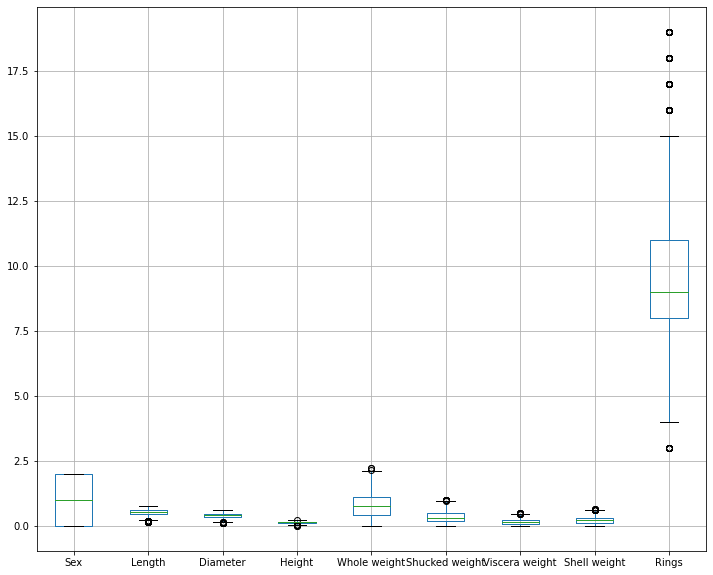

In [78]:
df.boxplot(figsize=[12,10])
plt.show()

- There are outliers present in all the columns accept in the 'Sex' colum.

### Seperating the target variable from other variables.

In [79]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [80]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [81]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

### Checking the skewness in the dataset

In [15]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

### Transforming the columns to handle skewness

In [16]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [83]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


## Removing Outliers

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z

array([[1.12707158, 0.68550213, 0.54986033, ..., 0.54098937, 0.69328289,
        0.587809  ],
       [1.12707158, 1.39634403, 1.38733299, ..., 1.31166208, 1.33295268,
        1.33241968],
       [1.30793479, 0.07077438, 0.00853714, ..., 0.36611642, 0.25513514,
        0.09826193],
       ...,
       [1.12707158, 0.59336612, 0.64519089, ..., 0.83813658, 1.01560749,
        0.59839786],
       [1.30793479, 0.85337516, 0.76992788, ..., 0.85873857, 0.81518436,
        0.51914542],
       [1.12707158, 1.83447784, 1.72628889, ..., 2.10364827, 1.61134422,
        1.65848824]])

In [19]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [86]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 4176, 4176, 4176]), array([0, 1, 2, ..., 5, 6, 7]))


In [87]:
df=df_new[(z<3).all(axis=1)]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [88]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [89]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

<AxesSubplot:>

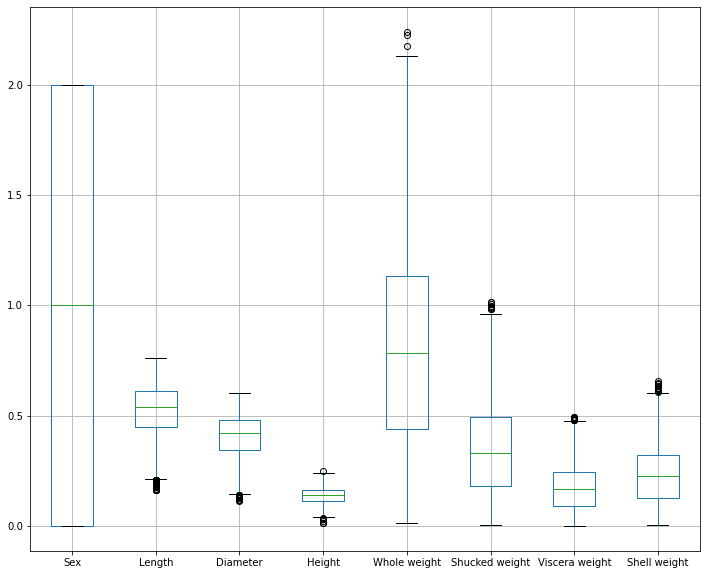

In [90]:
x.boxplot(figsize=(12,10))

In [92]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

-It is the reduced skewness of the dataset.

In [93]:
x.shape

(4027, 8)

In [94]:
y.shape

(4027,)

## Testing different models

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 399


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=22,random_state=399)

### Naive Bayes Classifeir Model testing -

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [97]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predictionmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predictionmnb))
print(confusion_matrix(y_test,predictionmnb))
print(classification_report(y_test,predictionmnb))

0.22727272727272727
[[0 0 0 1 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 4 1 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       1.00      0.33      0.50         3
           9       0.22      0.80      0.35         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.23        22
   macro avg       0.14      0.13      0.09        22
weighted avg       0.19      0.23      0.15        22



In [98]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predictiongnb=gnb.predict(x_test)
print(accuracy_score(y_test,predictiongnb))
print(confusion_matrix(y_test,predictiongnb))
print(classification_report(y_test,predictiongnb))

0.18181818181818182
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0]
 [0 0 1 2 1 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 2 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         3
           9       0.33      0.20      0.25         5
          10       0.00      0.00      0.00         2
          11       0.20      0.50      0.29         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.18        22
   macro avg       0.18      0.22      0.19        22
weighted avg       0.16      0.18      0.16  

## Support Vector Classifier model testing -

In [99]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.2727272727272727
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0]
 [0 0 0 2 2 1 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 3 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         2
           8       0.00      0.00      0.00         3
           9       0.25      0.40      0.31         5
          10       0.29      1.00      0.44         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.27        22
   macro avg       0.10      0.24      0.14        22
weighted avg       0.13      0.27      0.17   

In [100]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.22727272727272727
[[0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0]
 [0 1 2 2 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 1 0 3 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.33      1.00      0.50         2
           8       0.00      0.00      0.00         3
           9       0.20      0.40      0.27         5
          10       0.25      0.50      0.33         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.23        22
   macro avg       0.09      0.21      0.12        22
weighted avg       0.10      0.23      0.14        22



## Decision Tree Classifier model testing -

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



## Nearest Neighbors Classifier model testing -

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.18181818181818182
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0 0]
 [0 0 1 1 2 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         3
           9       0.29      0.40      0.33         5
          10       0.33      0.50      0.40         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.18        22


In [103]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [104]:
kneighbors(3)

0.13636363636363635
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0]
 [0 0 1 2 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         3
           9       0.17      0.20      0.18         5
          10       0.25      0.50      0.33         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.14        22
   macro avg       0.07      0.12      0.08        22
weighted avg       0.08      0.14      0.10  

In [105]:
kneighbors(4)

0.18181818181818182
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0 0]
 [0 0 1 1 2 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         3
           9       0.29      0.40      0.33         5
          10       0.33      0.50      0.40         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.18        22


In [106]:
kneighbors(5)

0.13636363636363635
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0 0]
 [0 0 1 2 1 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.40      1.00      0.57         2
           8       0.00      0.00      0.00         3
           9       0.12      0.20      0.15         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.14        22


In [107]:
kneighbors(7)

0.18181818181818182
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0]
 [0 0 1 1 2 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         3
           9       0.25      0.40      0.31         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      0.25      0.40         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.18        22
   macro avg       0.15      0.11      0.10        22
weighted avg       0.26      0.18      0.17  

## Finding out the Cross Validation Score for each model tested


In [108]:
from sklearn.model_selection import cross_val_score

### MultinomialNB Model

In [109]:
cvs=cross_val_score(mnb,x,y,cv=5)
print('The cross validation score for MultinomialNB model is :',cvs.mean(),'.')
print('The difference between accuracy and crossvalidation score is : 0.06112168008480648 .')

The cross validation score for MultinomialNB model is : 0.17159440839665244 .
The difference between accuracy and crossvalidation score is : 0.06112168008480648 .


### GaussianNB Model

In [110]:
cvs=cross_val_score(gnb,x,y,cv=5)
print('The cross validation score for GaussianNB model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : -0.004246339856172843.')

The cross validation score for GaussianNB model is : 0.23790885131698594
The difference between accuracy and crossvalidation score is : -0.004246339856172843.


### Support Vector Classifier Model


In [64]:
cvs=cross_val_score(svc,x,y,cv=5)
print('The cross validation score for SupportVectorClassification model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.16417815087528295.')

The cross validation score for SupportVectorClassification model is : 0.24491275821562616
The difference between accuracy and crossvalidation score is : 0.16417815087528295.


### Nearest Neighbor Model

In [65]:
cvs=cross_val_score(knn,x,y,cv=5)
print('The cross validation score for NearestNeighbor model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.19649428415895487.')

The cross validation score for NearestNeighbor model is : 0.21259662493195425
The difference between accuracy and crossvalidation score is : 0.19649428415895487.


### Decision Tree Classifier model

In [111]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.8003355012463111.')

The cross validation score for DecisionTreeClassifier model is : 0.20065379221059448
The difference between accuracy and crossvalidation score is : 0.8003355012463111.


- The minimum difference between the accuracy score and cross validation score is for the Support Vector Classifier model(0.16417815087528295) so , it is the best suited model for our dataset.

## Saving the best model

In [137]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(svc,open('pickledtcfile','wb'))

In [138]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([ 8,  9,  9,  9,  7,  9,  7, 10,  9,  9,  9,  7,  8,  7,  7,  9,  9,
       10, 10,  7,  9, 10])

## 